In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
from scipy import signal
import tkinter as tk
from tkinter import filedialog
import pathlib
from pathlib import Path
import os
import time
import librosa
import IPython.display as ipd
from librosa import display
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import math

# Regression Algorithms 
## Random Forest Regression

In [65]:
def downloadData(name):
    ## Download Data
    cwd = Path.cwd()
    file_path = Path(cwd).joinpath(r'Unit4', name)
    return pd.read_csv(file_path)

In [75]:
Operationsdf = downloadData("Bolt1Operationdf.csv")
Regulationdf = downloadData("Bolt1Regulationdf.csv")
Startdf =  downloadData("Bolt1Startdf.csv")

## Split to X and Y from Dataframe

In [78]:
    def getXandY(dataframe): 
        dfColumns = list(dataframe.columns)
        answer = list(dataframe['Bolt_1_Tensile'])
        Df = dataframe.drop(columns = ['Bolt_1_Tensile'],axis=1)
        return answer, Df

In [79]:
operationX, operationY = getXandY(Operationsdf)
regulationX, regulationY = getXandY(Regulationdf)
StartX, StartY = getXandY(Startdf)

## Split to training data and Scale


In [80]:
X_trainOperation, X_testOperation, y_trainOperation, y_testOperation = train_test_split(
        operationX, operationY, test_size=0.33,shuffle=False)

X_trainRegulation, X_testRegulation, y_trainRegulation, y_testRegulation = train_test_split(
        regulationX, regulationX, test_size=0.33,shuffle=False)

X_trainStart, X_testStart, y_trainStart, y_testStart = train_test_split(
        StartX, StartY, test_size=0.33,shuffle=False)



In [81]:
def scaleData(Xtrain,Xtest):
    scaler = RobustScaler()
    scaler.fit(X_train)
    scaledTrainingData = scaler.transform(X_train)
    scaler.fit(X_test)
    scaledTestData = scaler.transform(X_test)
    return scaledTrainingData, scaledTestData

In [82]:
OperationTrainingData, OperationTestData = scaleData(X_trainOperation,X_testOperation)
RegulationTrainingData, RegulationTestData = scaleData(X_trainRegulation,X_testRegulation)
StartTrainingData, StartTestData = scaleData(X_trainStart,X_testStart)

## Plot Scaled Data

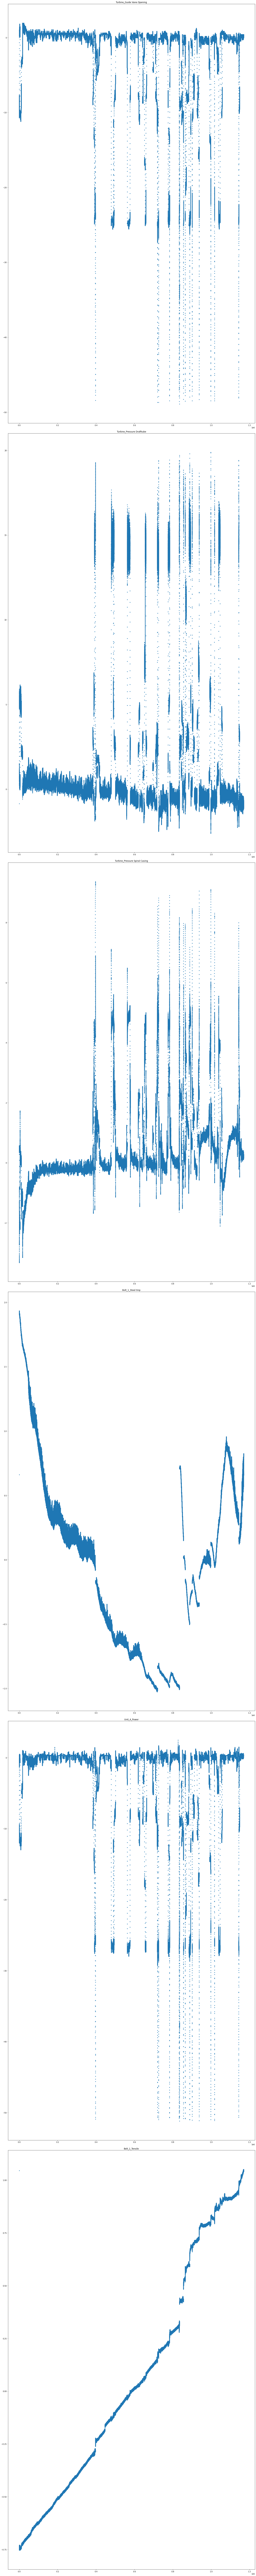

In [83]:
##Operation
fig, axs = plt.subplots(len(OperationTrainingData[0]), figsize = (20, 200))
Traintime = np.linspace(0,len(OperationTrainingData),len(OperationTrainingData), dtype = 'int')
axs = axs.flatten()
for i in range(0,len(axs)):
    currentData = []
    for num in Traintime-1:
        currentData.append(OperationTrainingData[num][i])
    axs[i].scatter(Traintime, currentData, marker = ".")
    axs[i].set_title(dfColumns[i])
fig.tight_layout()
plt.show()

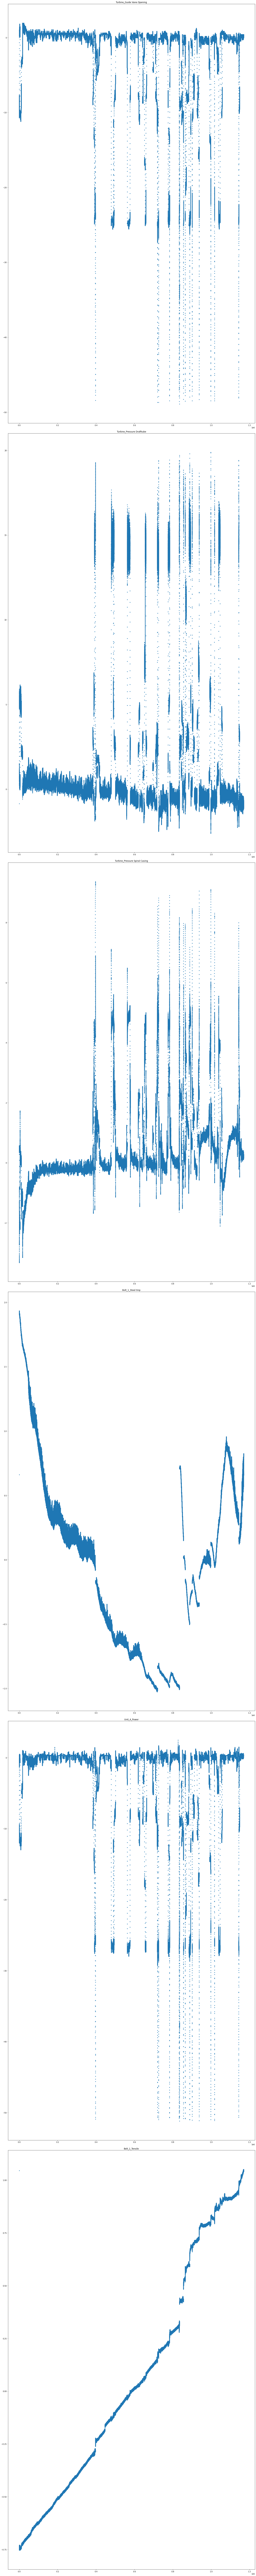

In [84]:
##Regulation
fig, axs = plt.subplots(len(RegulationTrainingData[0]), figsize = (20, 200))
Traintime = np.linspace(0,len(RegulationTrainingData),len(RegulationTrainingData), dtype = 'int')
axs = axs.flatten()
for i in range(0,len(axs)):
    currentData = []
    for num in Traintime-1:
        currentData.append(RegulationTrainingData[num][i])
    axs[i].scatter(Traintime, currentData, marker = ".")
    axs[i].set_title(dfColumns[i])
fig.tight_layout()
plt.show()

In [ ]:
##Start
fig, axs = plt.subplots(len(StartTrainingData[0]), figsize = (20, 200))
Traintime = np.linspace(0,len(StartTrainingData),len(StartTrainingData), dtype = 'int')
axs = axs.flatten()
for i in range(0,len(axs)):
    currentData = []
    for num in Traintime-1:
        currentData.append(StartTrainingData[num][i])
    axs[i].scatter(Traintime, currentData, marker = ".")
    axs[i].set_title(dfColumns[i])
fig.tight_layout()
plt.show

## Use RandomForestRegressor

In [61]:
#Operation
OperationTrainingData = np.array(OperationTrainingData)
tic = time.time()
regrOperation = RandomForestRegressor(max_depth=100, random_state=0, n_jobs = -1)
regr.fit(OperationTrainingData, y_trainOperation)
toc = time.time()
print(toc-tic)

#Regulation
RegulationTrainingData = np.array(RegulationTrainingData)
tic = time.time()
regrRegulation = RandomForestRegressor(max_depth=100, random_state=0, n_jobs = -1)
regr.fit(RegulationTrainingData, y_trainRegulation)
toc = time.time()
print(toc-tic)

#Start
StartTrainingData = np.array(StartTrainingData)
tic = time.time()
regrStart = RandomForestRegressor(max_depth=100, random_state=0, n_jobs = -1)
regr.fit(StartTrainingData, y_trainStart)
toc = time.time()
print(toc-tic)

ValueError: Found input variables with inconsistent numbers of samples: [575778, 1169002]

In [18]:
#Operation
y_predict = regr.predict(OperationTestData)
MSEOperation = mean_squared_error(y_testOperation, y_predict)

#Regulation
y_predict = regr.predict(RegulationTestData)
MSERegulation = mean_squared_error(y_testRegulation, y_predict)

#Start
y_predict = regr.predict(StartTestData)
MSEStart = mean_squared_error(y_testStart, y_predict)

In [51]:
#Mean error for three models
print((MSEOperation + MSERegulation + MSEStart )/3)

190.81509119801137


## Plot tredicted vs Acctual

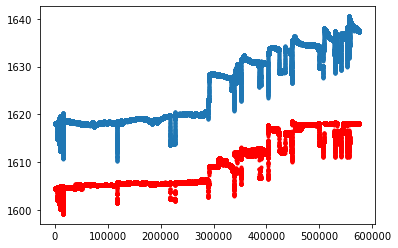

In [20]:
Testtime = np.linspace(0,len(y_test),len(y_test),dtype='int')
plt.scatter(Testtime, y_test, marker = ".",color = 'b')
plt.scatter(Testtime, y_predict, marker = ".",color = 'r')
plt.show()

In [37]:
type(X_train)

pandas.core.frame.DataFrame

## CrossValidation RandomForestRegresion

[2.2217472724083946]
309.5174865722656


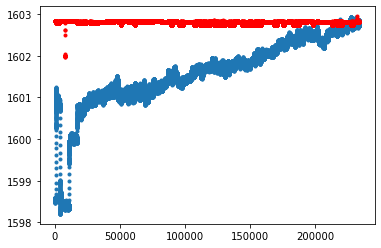

[2.2217472724083946, 0.8379104046387231]
319.23950004577637


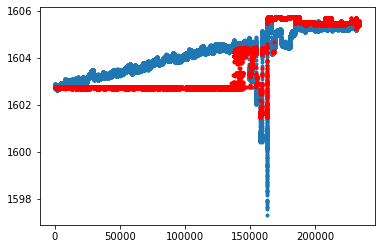

[2.2217472724083946, 0.8379104046387231, 0.41503198821237164]
323.33945870399475


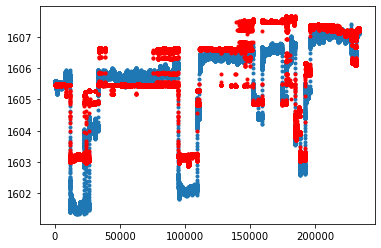

[2.2217472724083946, 0.8379104046387231, 0.41503198821237164, 4.1735794939488295]
329.35346364974976


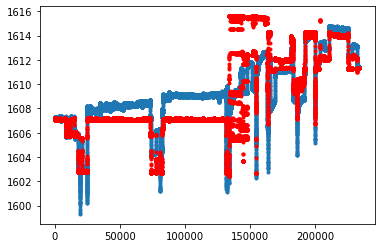

[2.2217472724083946, 0.8379104046387231, 0.41503198821237164, 4.1735794939488295, 5.080177353470879]
328.7814657688141


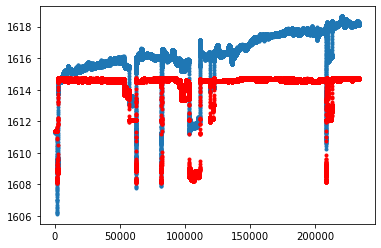

In [54]:
model = RandomForestRegressor(max_depth=10, random_state=0)
cv = KFold(n_splits=5, shuffle=False)
scaler = RobustScaler()
score = []
for train_index, test_index in cv.split(X_train, y_train):
    tic = time.time()
    XSubTrain, XSubTest = X_train.iloc[[x for x in train_index]], X_train.iloc[[ x for x in test_index]]
    ySubTrain, ySubTest = [y_train[i] for i in train_index], [y_train[i] for i in test_index]
    scaler.fit(XSubTrain)
    scaledTrainingData = scaler.transform(XSubTrain)
    scaledTestData = scaler.transform(XSubTest)
    model.fit(scaledTrainingData,ySubTrain)
    y_predict = model.predict(scaledTestData)
    score.append(mean_squared_error(y_predict, ySubTest))
    print(score)
    toc = time.time()
    print(toc-tic)
    Testtime = np.linspace(0,len(ySubTest),len(ySubTest),dtype='int')
    plt.scatter(Testtime, ySubTest, marker = ".")
    plt.scatter(Testtime, y_predict, marker = ".",color = 'r')
    plt.show()

In [55]:
scaledTrainingData = scaler.transform(X_test)
y_predict = model.predict(scaledTrainingData)
MSE = mean_squared_error(y_test, y_predict)

In [56]:
print(MSE)

190.68006794014113


## Plot Predicted vs act. with CrossValidation

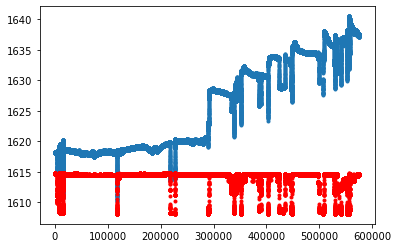

In [57]:
Testtime = np.linspace(0,len(y_test),len(y_test),dtype='int')
plt.scatter(Testtime, y_test, marker = ".")
plt.scatter(Testtime, y_predict, marker = ".",color = 'r')
plt.show()

## Lienear 